In [76]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [77]:
# loading the 'Student Mental health' csv data
df = pd.read_csv('/content/Student Mental health.csv')

In [78]:
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [79]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [81]:
#checking the unique value
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [82]:
df['What is your course?'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [83]:
df['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [84]:
df['What is your CGPA?'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [85]:
# Making a copy of original data.
data = df.copy()

In [86]:
# Dropping timestamp column
data.drop(['Timestamp'], axis=1, inplace=True)
data.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [87]:
# Renaming column names

data.rename(columns={
                            'Choose your gender' : 'gender',
                            'Age' : 'age',
                            'What is your course?' : 'course',
                            'Your current year of Study' : 'current_year',
                            'What is your CGPA?' : 'CGPA',
                            'Marital status' : 'marital_status',
                            'Do you have Depression?' : 'depression',
                            'Do you have Anxiety?' : 'anxiety',
                            'Do you have Panic attack?'  : 'panic_attack',
                            'Did you seek any specialist for a treatment?' : 'visited_any_specialist'}, inplace=True)
data.head()

,gender,age,course,current_year,CGPA,marital_status,depression,anxiety,panic_attack,visited_any_specialist
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [88]:
data["current_year"].replace("Year 1","year 1", inplace=True)
data["current_year"].replace("Year 2","year 2", inplace=True)
data["current_year"].replace("Year 3","year 3", inplace=True)
data["current_year"].replace("Year 4","year 4", inplace=True)
data.head()

,gender,age,course,current_year,CGPA,marital_status,depression,anxiety,panic_attack,visited_any_specialist
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [89]:
#correcting the format by deleting space
data["CGPA"].replace("3.50 - 4.00 ","3.50 - 4.00", inplace=True)
data.head()

,gender,age,course,current_year,CGPA,marital_status,depression,anxiety,panic_attack,visited_any_specialist
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [90]:
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [91]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
gender                    0
age                       1
course                    0
current_year              0
CGPA                      0
marital_status            0
depression                0
anxiety                   0
panic_attack              0
visited_any_specialist    0
dtype: int64


In [92]:
# dropping row where value of age is null
data.dropna(inplace=True)
data.isna().sum()

gender                    0
age                       0
course                    0
current_year              0
CGPA                      0
marital_status            0
depression                0
anxiety                   0
panic_attack              0
visited_any_specialist    0
dtype: int64

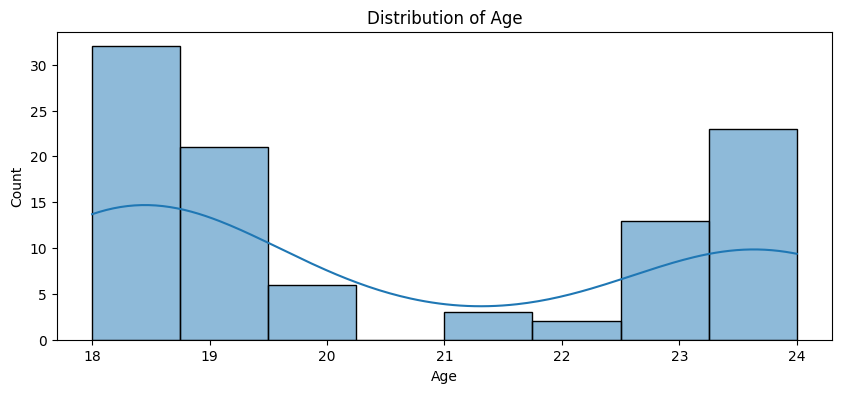

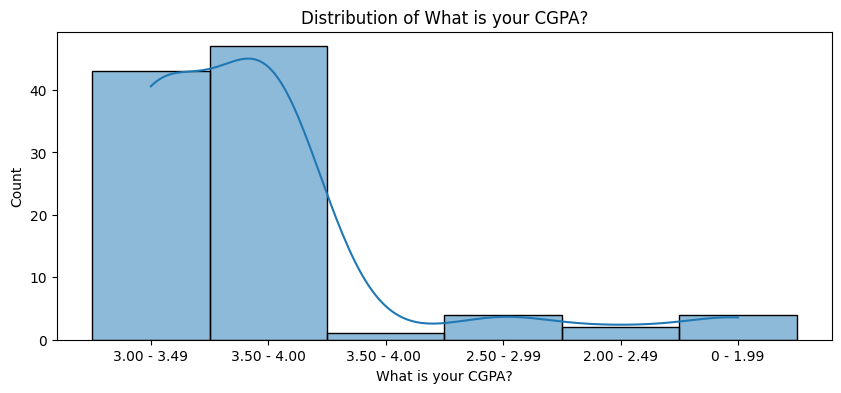

In [93]:
Data_1 = ['Age', 'What is your CGPA?']

for column in Data_1:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

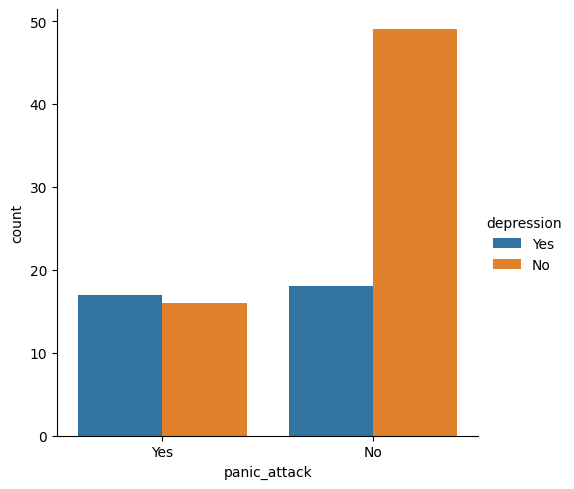

In [94]:
sns.catplot(data, x="panic_attack", hue='depression', kind="count")

**ML MODEL And evaluating the models**

In [95]:
data.head()

,gender,age,course,current_year,CGPA,marital_status,depression,anxiety,panic_attack,visited_any_specialist
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [96]:
df_encode = pd.get_dummies(data, columns=["gender","marital_status","current_year","anxiety","panic_attack","visited_any_specialist",'course','CGPA'], prefix=['gender',"marital_status","current_year","anxiety","panic_attack","visted_specialist",'course','cgpa'], drop_first = True)

In [97]:
df_encode.head(5)

,age,depression,gender_Male,marital_status_Yes,current_year_year 2,current_year_year 3,current_year_year 4,anxiety_Yes,panic_attack_Yes,visted_specialist_Yes,...,course_Radiography,course_TAASL,course_Usuluddin,course_engin,course_koe,course_psychology,cgpa_2.00 - 2.49,cgpa_2.50 - 2.99,cgpa_3.00 - 3.49,cgpa_3.50 - 4.00
0,18.0,Yes,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,21.0,No,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,19.0,Yes,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22.0,Yes,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,23.0,No,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
df_encode.columns

Index(['age', 'depression', 'gender_Male', 'marital_status_Yes',
       'current_year_year 2', 'current_year_year 3', 'current_year_year 4',
       'anxiety_Yes', 'panic_attack_Yes', 'visted_specialist_Yes',
       'course_Accounting ', 'course_BCS', 'course_BENL', 'course_BIT',
       'course_Banking Studies', 'course_Benl', 'course_Biomedical science',
       'course_Biotechnology', 'course_Business Administration', 'course_CTS',
       'course_Communication ', 'course_DIPLOMA TESL',
       'course_Diploma Nursing', 'course_ENM', 'course_Econs', 'course_Engine',
       'course_Engineering', 'course_Fiqh', 'course_Fiqh fatwa ',
       'course_Human Resources', 'course_Human Sciences ', 'course_IT',
       'course_Irkhs', 'course_Islamic Education', 'course_Islamic education',
       'course_KENMS', 'course_KIRKHS', 'course_KOE', 'course_Kirkhs',
       'course_Koe', 'course_Kop', 'course_Law', 'course_Laws', 'course_MHSC',
       'course_Malcom', 'course_Marine science', 'course_Mathe

In [99]:
X=df_encode[['age','gender_Male', 'marital_status_Yes','current_year_year 2', 'current_year_year 3', 'current_year_year 4','anxiety_Yes', 'panic_attack_Yes', 'visted_specialist_Yes','course_Accounting ', 'course_BCS', 'course_BENL','course_Banking Studies', 'course_Biomedical science','course_Biotechnology', 'course_Business Administration', 'course_CTS','course_Communication ', 'course_DIPLOMA TESL','course_Diploma Nursing', 'course_ENM', 'course_Econs','course_Engineering', 'course_Fiqh', 'course_Human Resources','course_Human Sciences ', 'course_IT', 'course_Irkhs','course_Islamic Education', 'course_KENMS', 'course_KOE', 'course_Koe','course_Kop', 'course_Law', 'course_MHSC', 'course_Malcom','course_Marine science', 'course_Mathemathics', 'course_Nursing ','course_Pendidikan Islam', 'course_Pendidikan Islam ','course_Psychology', 'course_Radiography', 'course_TAASL','course_Usuluddin ', 'cgpa_2.00 - 2.49', 'cgpa_2.50 - 2.99','cgpa_3.00 - 3.49', 'cgpa_3.50 - 4.00']]
y=df_encode['depression']

In [100]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random forest**

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
#Fitting the Model and Evaluating
rf = RandomForestClassifier()

In [103]:
#fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
#predicting the value of testing data
y_pred = rf.predict(X_test)

In [106]:
# Create a DataFrame to display actual and predicted labels side by side
predictions_df = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_pred})

# Display the DataFrame
print(predictions_df)

   Actual Labels Predicted Labels
84            No               No
54           Yes               No
71            No               No
46            No               No
45            No               No
39           Yes              Yes
22            No               No
81            No               No
10            No               No
0            Yes               No
18            No               No
30            No               No
74            No               No
33           Yes              Yes
91            No              Yes
4             No               No
77            No               No
78            No               No
12           Yes               No
31            No               No


In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#check accuracy OF THE MODEL
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#summarise the performance of a classification algorithm
conf_matrix = confusion_matrix(y_test, y_pred)

#PRINT THE RESULT FOR ACCURACY
print("Accuracy:", accuracy)
#PRINT THE RESULT FOR CLASSIFICATION REPORT
print("Classification Report:\n", report)
#PRINT THE RESULT FOR CONFUSION MATRIX
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.93      0.87        15
         Yes       0.67      0.40      0.50         5

    accuracy                           0.80        20
   macro avg       0.75      0.67      0.69        20
weighted avg       0.78      0.80      0.78        20

Confusion Matrix:
 [[14  1]
 [ 3  2]]


Random forest provides good accuracy as compared to ML models